<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Nuñez, Sean Patrick N.<br>
    201912068 <br>
   58051 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [206]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [205]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [204]:
import numpy as np
### Vectorizing the data


sales_mat = np.array(df_sales.set_index('flavor'))
prices_mats = np.array(df_prices)[:1] ## reshape this vector to the appropriate size
costs_mats = np.array(df_prices)[1:] ## reshape this vector to the appropriate size
Prices_mat = np.transpose(prices_mats)
Costs_mat = np.transpose(costs_mats)

## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [207]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales * price
    monthly_costs   = sales * cost
    monthly_profits = monthly_revenue - monthly_costs  
    
    monthlyprofit = monthly_profits.transpose()
    Monthlyprofits = monthlyprofit.sum(axis = 1)

    df_profit = pd.DataFrame(Monthlyprofits)
    df_profit.columns = ["Monthly Profits"]
    df_profit.index = ["January     [1st month]",
                       "February    [2nd month]",
                       "March       [3rd month]",
                       "April       [4th month]",
                       "May         [5th month]",
                       "June        [6th month]",
                       "July        [7th month]",
                       "August      [8th month]",
                       "September   [9th month]",
                       "October     [10th month]",
                       "November    [11th month]",
                       "December    [12th month]"]
                       
    print(df_profit)
    print("")
    print("")
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [208]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
print("Monthly Revenue:\n \n" ,month_rev)
print("\nMonthly Cost:\n \n"    ,month_cost)
print("\nMonthly Profit:\n \n"   ,month_rev)

                          Monthly Profits
January     [1st month]             79371
February    [2nd month]             59208
March       [3rd month]             53850
April       [4th month]             10001
May         [5th month]             52824
June        [6th month]              5527
July        [7th month]              5598
August      [8th month]              5498
September   [9th month]              5034
October     [10th month]             7213
November    [11th month]            76548
December    [12th month]           117156


Monthly Revenue:
 
 [ 27335  18340  12740   5495  31290   1960   3115   1435    805   2730
   8085  31465   5250   8100   8600    800   3075     25     75      0
     25    150   7800  13700  11980  13480  17080    280   9340   1560
    720    960   1500   1960  15620  32040   4340   3920   3990    805
   6930    420   1120   1435    805   1260  10500  19810  32250  24900
  44250   4900   8850   4900   2150   4800   1300   3550  27450  44850
   840

## Part 2: Flavor Sales

In [228]:
#Create a function that *returns* and prints the flavor profits for the whole year 
flavors = []
def flavor_sales(price, cost, sales):
    flavor_revenue = sales * price
    flavor_costs = sales * cost
    flavor_profits = flavor_revenue - flavor_costs 
    
    Red_Velvet = flavor_profits[0].sum()
    flavors.append(Red_Velvet)

    Oreo = flavor_profits[1].sum()
    flavors.append(Oreo)

    Sugar_glazed = flavor_profits[2].sum()
    flavors.append(Sugar_glazed)

    Almond_Honey = flavor_profits[3].sum()
    flavors.append(Almond_Honey)

    Matcha =  flavor_profits[4].sum()
    flavors.append(Matcha)

    Strawberry_Cream =  flavor_profits[5].sum()
    flavors.append(Strawberry_Cream)

    Brown_sugar_Boba =  flavor_profits[6].sum()
    flavors.append(Brown_sugar_Boba)

    Fruits_and_Nuts =  flavor_profits[7].sum()
    flavors.append(Fruits_and_Nuts)

    Dark_Chocolate =  flavor_profits[8].sum()
    flavors.append(Dark_Chocolate)

    Chocolate_and_Orange =  flavor_profits[9].sum()
    flavors.append(Chocolate_and_Orange)

    Choco_Mint =  flavor_profits[10].sum()
    flavors.append(Choco_Mint)

    Choco_Butter_Naught =  flavor_profits[11].sum()
    flavors.append(Choco_Butter_Naught)

    df_flavors = pd.DataFrame(flavors)
    df_flavors.columns = ["Yearly Profit"]
    df_flavors.index = ["Red Velvet",
                        "Oreo",
                        "Sugar Glazed",
                        "Almond Honey",
                        "Matcha",
                        "Strawberry Cream","Brown sugar Boba",
                        "Fruits and Nuts","Dark Chocolate","Chocolate and Orange",
                        "Choco Mint","Choco Butter Naught"]
                        
    print(df_flavors)
    return flavor_profits.flatten()

In [229]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
print("\nRevenue:\n \n" , flavor_profit)

                      Yearly Profit
Red Velvet                    41370
Oreo                          19040
Sugar Glazed                  53260
Almond Honey                  23715
Matcha                        61245
Strawberry Cream              18387
Brown sugar Boba              30660
Fruits and Nuts               39820
Dark Chocolate                44790
Chocolate and Orange          27615
Choco Mint                    26156
Choco Butter Naught           91770

Revenue:
 
 [ 7810  5240  3640  1570  8940   560   890   410   230   780  2310  8990
  2100  3240  3440   320  1230    10    30     0    10    60  3120  5480
  5990  6740  8540   140  4670   780   360   480   750   980  7810 16020
  1860  1680  1710   345  2970   180   480   615   345   540  4500  8490
  9675  7470 13275  1470  2655  1470   645  1440   390  1065  8235 13455
  1890  3348  3321   702  1467   234   405   198   486   369  1863  4104
  9810  3800  1540   140  1470   150   980   330   230   360  5520  6330
  9560  

In [ ]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
best_3_flavors = [("First:" ,df_sales.iloc[11]['flavor']),("second:",df_sales.iloc[10]['flavor']),("third:",df_sales.iloc[9]['flavor'])]
print("Best Selling Flavors:",best_3_flavors)
worst_3_flavors = [("First:" ,df_sales.iloc[0]['flavor']),("second:",df_sales.iloc[1]['flavor']),("third:",df_sales.iloc[2]['flavor'])]
print("Least Selling Flavors:",worst_3_flavors)

Best Selling Flavors: [('First:', 'choco butter naught'), ('second:', 'choco mint'), ('third:', 'chocolate and orange')]
Least Selling Flavors: [('First:', 'red velvet'), ('second:', 'oreo'), ('third:', 'sugar glazed')]


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

#### Monthly Sales

TypeError: ignored

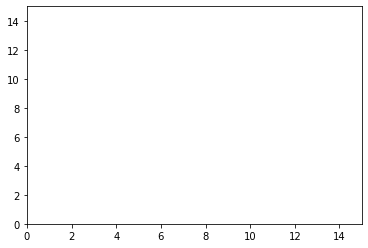

In [237]:
A = np.array([[79371, 59208, 53850, 10001, 52824, 5527, 5598, 5498, 5034,
               7213, 76548, 117156]])

plt.xlim(0,15)
plt.ylim(0,15)

# plt.quiver(0,0, A[0,0], A[0,1], angles='xy', scale_units='xy',scale=1, color='red') 
# plt.quiver(0,0, A[1,0], A[1,1], angles='xy', scale_units='xy',scale=1, color='blue')


plt.quiver([0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]
           ,[0,0],
           A[:,0], A[:,1], A[:,2], A[:,3], A[:,4], A[:,5], A[:,6], A[:,7]
           , A[:,8],
            A[:,9], A[:,10], A[:,11],
           angles = 'xy', scale_units = 'xy',scale =1, 
           color=['crimson','yellow','brown','blue','pink','orange','purple'
           ,'green','grey','yellowgreen', 'violet red','dandelion'
           ])## use column spaces

plt.grid()
plt.show()






#### Flavor Sales

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

Add your statement here